## 목표 : 무게에 따른 생선 길이를 예측하는 모델
- 데이터  : fish.csv
- feature : Weight
- Label   : Length
- 학습방법: 지도학습 + 예측-> KNN기반 회귀
- 학습 : 테스트 데이터 = 7 : 3

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

fish = pd.read_csv('../data/fish.csv', usecols=[0,1,2])
fish.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [76]:
# 학습에 사용할 데이터 추출하기
perch = fish[fish.Species == 'Perch']

#인덱스 정리
perch.reset_index(drop = True, inplace=True)

In [77]:
perch.head()

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4


## 전처리하기 <hr>
- 이상치
- 결측값
- 중복값 처리
- 산점도 보기


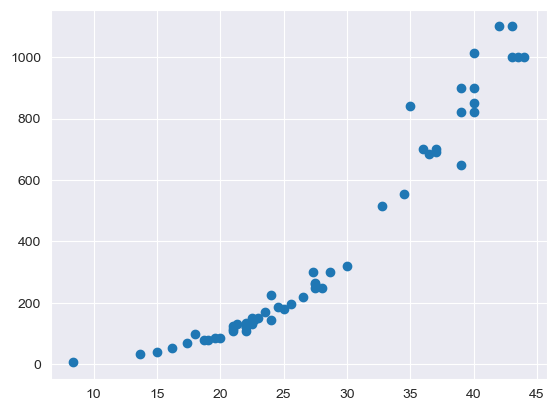

In [78]:
plt.scatter(perch.Length, perch.Weight, label = perch)

In [79]:
perch.corr(numeric_only= True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [80]:
#1에 가까운 수치 = 높은 상관관계.
#무게 - 길이 : 비례관계. 


## Feature, Label 분리
- feature : Weight 
- label   : Length

In [81]:
feature = perch.Weight
label = perch.Length

In [82]:
model = KNeighborsRegressor()
model

KNeighborsRegressor()

In [83]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(perch[['Weight']], perch[['Length']], test_size= 0.3, random_state= 10)
#x_train = pd.DataFrame[[x_train]]
#y_train = pd.DataFrame[[y_train]]

In [90]:
#데이터셋 확인
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(39, 1)
(39, 1)
(17, 1)
(17, 1)


In [91]:
model.fit(x_train, y_train)

KNeighborsRegressor()

In [92]:
model.score(x_test, y_test)

0.9682161848657337

Test
- 제대로 만들어진 모델인지 확인하는 과정
    * 훈련용 데이터에 대한 점수
    * 테스트용 데이터에 대한 점수
    * 훈련점수와 테스트 점수 비교
        * 훈련점수 > 테스트점수 : 과대적합
        * 훈련점수 ↓ 테스트점수↓ : 과소적합
        * 훈련점수 ≒ 테스트점수 : 최적적합

## 성능평가

In [93]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print(f' train score: {train_score} \n test score: {test_score}')

 train score: 0.9640747219648318 
 test score: 0.9682161848657337


In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # 모델의 성능을 평가할 떄 사용함

y_pre = model.predict(perch[['Weight']]) # 예측값 계산
y_pre = np.round(y_pre, 1)

# 결정 계수 값
print('결정계수값 :', r2_score(perch['Length'], y_pre))

# 평균제곱오차: MSE
print('평균제곱오차 :', mean_squared_error(perch['Length'], y_pre))

# 루트평균제곱오차
rmse = mean_squared_error(y_test, y_pre, squared=False)

#w절대제곱오차
mae = mean_absolute_error(y_test, y_pre)

# 평균절댓값오차
print('평균절댓값오차 :', mean_absolute_error(perch['Length'], y_pre))

결정계수값 : 0.9662011007380166
평균제곱오차 : 2.7017857142857147


ValueError: Found input variables with inconsistent numbers of samples: [17, 56]

In [ ]:
# 5. 성능 평가
# - 과대 적합을 판단할 수 있다.
#   : 예측값과 실제값의 차이를 나타낸 지표로 
# 1) MSE
print('1) MSE:', mean_squared_error(y_test, y_pred))    # 7.42
# 2) MAE
print('2) MAE:', mean_absolute_error(y_test, y_pred))   # 1.739
# 3) R2
r2_scores = r2_score(y_test, y_pred)
print('3) R2:', r2_scores)   # 0.88
# 4) RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('4) RMSE:', rmse) # 2.724